<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/ML_5_Bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features].copy()

In [6]:
X = X.fillna(X.mean())

In [7]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

In [13]:
df['Cluster'] = clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print("\nPoints per cluster:")
print(df['Cluster'].value_counts().sort_index())

Number of clusters: 6
Number of noise points: 60

Points per cluster:
Cluster
-1    60
 0    17
 1     5
 2    51
 3    28
 4    32
 5     7
Name: count, dtype: int64


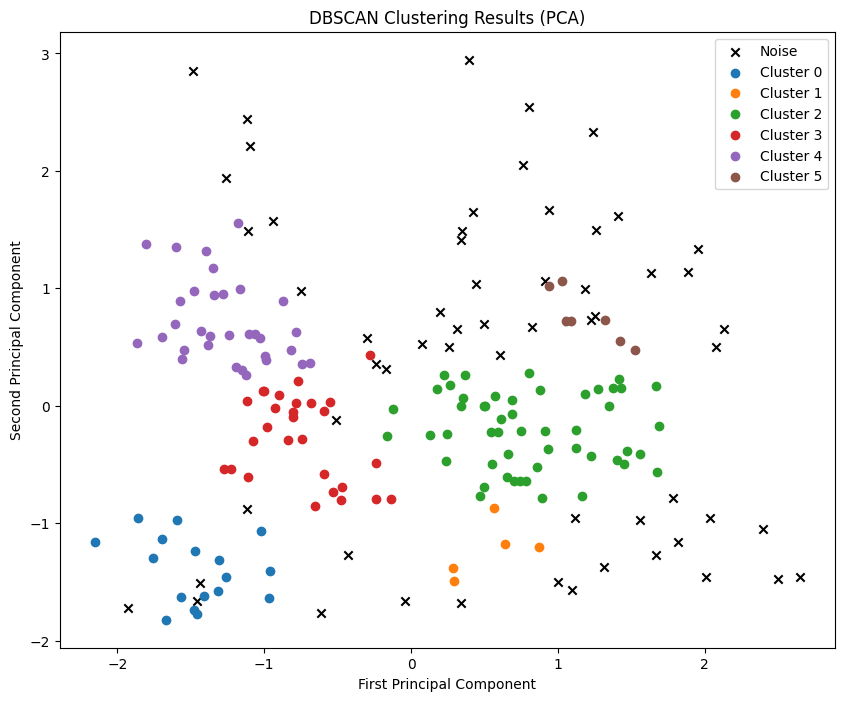

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[clusters == -1, 0], X_pca[clusters == -1, 1],
           c='black', marker='x', label='Noise')
for i in range(n_clusters):
    plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1],
               marker='o', label=f'Cluster {i}')

plt.title('DBSCAN Clustering Results (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()